# Project: Investigate a Dataset (TMDb Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
    
## Introduction




> In this project, I have selected **The Movie Database (TMDb) Dataset** for my analysis.
> The dataset contains information of more than ten thousand movies from 1960 to 2015.

> **The questions that I am hoping to answer using this dataset are as follows:**
    >> 1. What are the average popularities of movies according to various budget levels?
    >> 2. How does the average profit vary with budget levels?
    >> 3. In which years the maximum and minimum profits generated?
    >> 4. How much money is spent on movies every year? During which years the maximum amount of money spent?
    >
    > **Which of the following attributes lead to a successful movie (in terms of profitability)**<br />
        >> I) Genre <br />
        > II) Cast <br />
        > III) Director <br />
        > IV) Production Company <br />
        > V) Budget <br />
        > VI) Revenue <br />
        > VII) Runtime <br />




In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section, data is to be loaded and the columns that are not required are removed.
> Also, the rows containing null and zero values are to be removed

### General Properties
> Exploring the data and its properties

In [3]:
# Loading data

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Checking information about various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Checking the datatypes of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# Checking the number of zero values in the budget column
df.query('budget == 0').budget.value_counts()

0    5696
Name: budget, dtype: int64

In [8]:
# Checking the number of zero values in the revenue column
df.query('revenue == 0').revenue.value_counts()

0    6016
Name: revenue, dtype: int64

In [9]:
# Checking the number of zero values in the runtime column
df.query('runtime == 0').runtime.value_counts()

0    31
Name: runtime, dtype: int64

### Data Cleaning

> The data containing null and zero values is removed.
> 
> The duplicates are also taken care of in this section.

> #### 1. Dropping columns which are not required

In [10]:
# Making a list of all the column names which are not required
not_req = ['id','imdb_id','homepage','tagline','keywords','overview', 'release_date', 'budget_adj','revenue_adj']

# Dropping unrequired columns from the dataset
df.drop(not_req, axis=1, inplace=True)

In [11]:
# Checking to see if the columns have been dropped
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015


In [12]:
# Getting the total number of rows and columns in the dataset
df.shape

(10866, 12)

> #### 2. Dropping duplicate rows from the dataset

In [13]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [14]:
# Checking if the duplicates have been dropped
df.shape

(10865, 12)

> #### 3. Deleting rows containing zero and null values

In [15]:
# List of columns containing zero values
drop_zero = ['budget', 'revenue', 'runtime']

# Replacing zero with NAN using numpy
df[drop_zero] = df[drop_zero].replace(0, np.NAN)

In [16]:
#Dropping rows with Null values
df.dropna(subset = drop_zero, inplace = True)

# Checking to see if the rows have been dropped
df.shape

(3854, 12)

> #### This is the end of data wrangling and cleaning process.

In [17]:
# Checking the final, clean dataset
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015


<a id='eda'></a>
## Exploratory Data Analysis

> Now that our data is clean as per the need, we can proceed further to analyse the data and answer the posed questions.


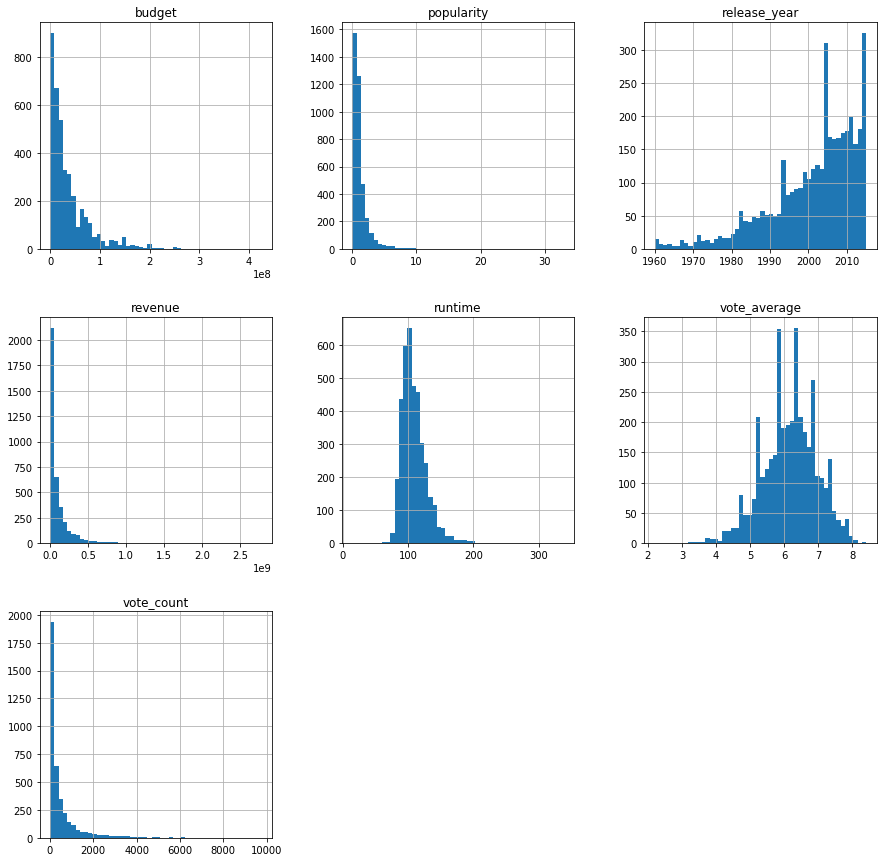

In [18]:
# Checking the distribution of all the parameters in our data
df.hist(figsize = (15,15), bins=50);

### 1. What are the average popularities of movies according to various budget levels?

In [19]:
# In order to analyse the data corresponding to budget levels,
# we need to create a new column named budget_range and 
# store the levels according to the budget

# Creating bin_edges and bin_names for adding data into new column
bin_edges = df['budget'].describe()[3:8]
bin_names = ['Low', 'Medium', 'Moderately High', 'High']

# Creating the new column and storing the required data
df['budget_range'] = pd.cut(df['budget'], bin_edges, labels=bin_names)


In [20]:
# Checking to see if the new column has been added
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_range
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,High
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,High
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,High
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,High
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,High


In [21]:
# Taking the mean popularity according to budget levels
b_r = df.groupby('budget_range')['popularity'].mean()
b_r

budget_range
Low                0.686413
Medium             0.951718
Moderately High    1.142414
High               2.080911
Name: popularity, dtype: float64

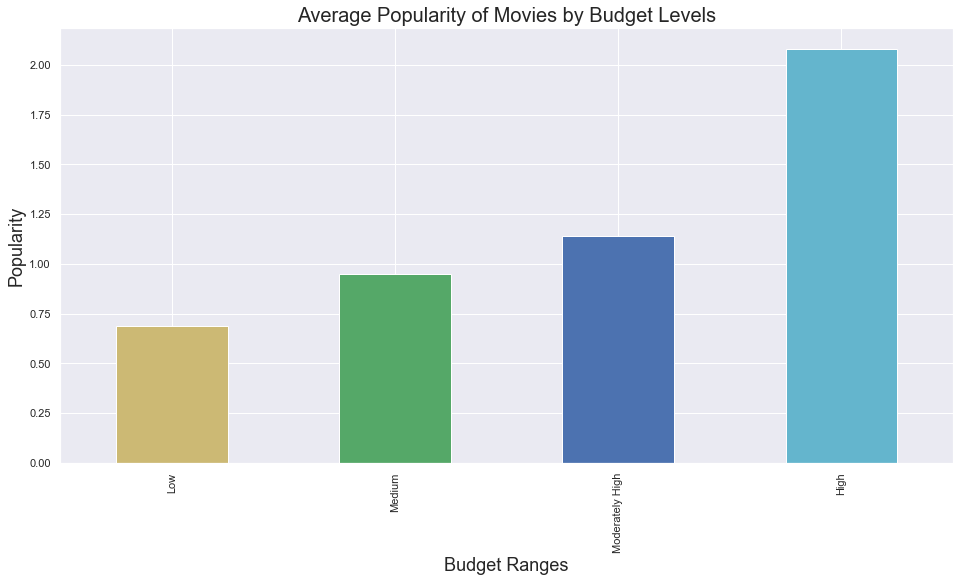

In [22]:
# Plotting a bar graph for popularity versus budget levels
sns.set()

b_r.plot(kind = 'bar', color = ['y','g','b','c'], figsize=(16,8))

plt.title('Average Popularity of Movies by Budget Levels', fontsize = 20)
plt.xlabel('Budget Ranges', fontsize = 18)
plt.ylabel('Popularity', fontsize = 18);

> **It is observed that the movies having high budgets tend to be more popular.**

### 2. How does the average profit vary with budget levels?

In [23]:
# In order to find out how profits vary with budget levels,
# we need to insert a new column containing the profit or loss
# incurred through a movie

# Inserting a column
df.insert(3, 'profit_loss',df['revenue']-df['budget'])

In [24]:
# Checking to see if the column has been inserted
df.head()

,popularity,budget,revenue,profit_loss,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_range
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,High
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,High
2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,High
3,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,High
4,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,High


In [25]:
# Taking the total profit/loss according to budget levels
p_l = df.groupby('budget_range')['profit_loss'].mean()
p_l

budget_range
Low                2.194724e+07
Medium             4.003139e+07
Moderately High    5.500846e+07
High               1.755475e+08
Name: profit_loss, dtype: float64

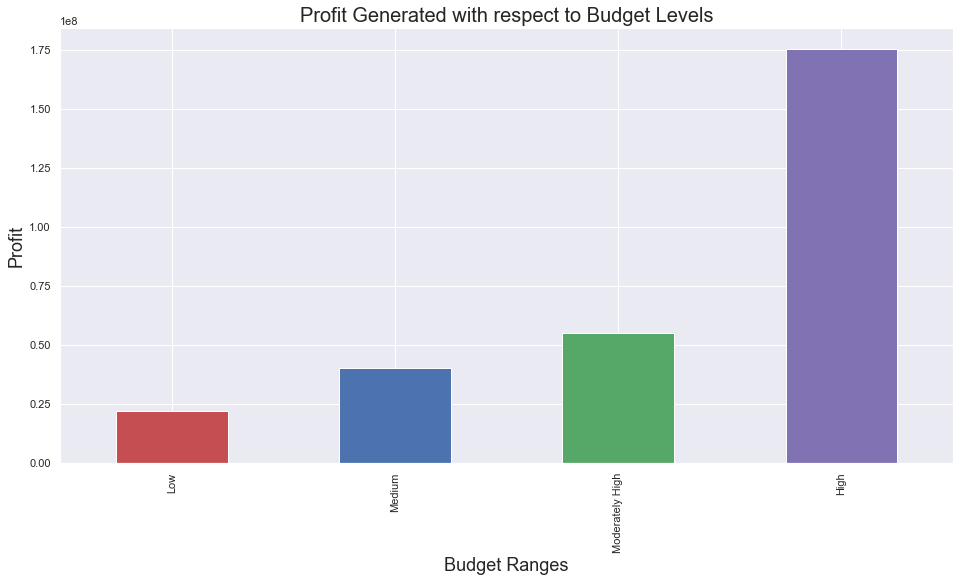

In [26]:
# Plotting a bar graph of Profit
sns.set()

p_l.plot(kind = 'bar', color = ['r','b','g','m'], figsize = (16,8))

plt.title('Profit Generated with respect to Budget Levels', fontsize = 20)
plt.xlabel('Budget Ranges', fontsize=18)
plt.ylabel('Profit', fontsize=18);

> **It is observed that profits generated are higher for movies with higher budget.**

### 3. In which years the maximum and minimum profits generated?

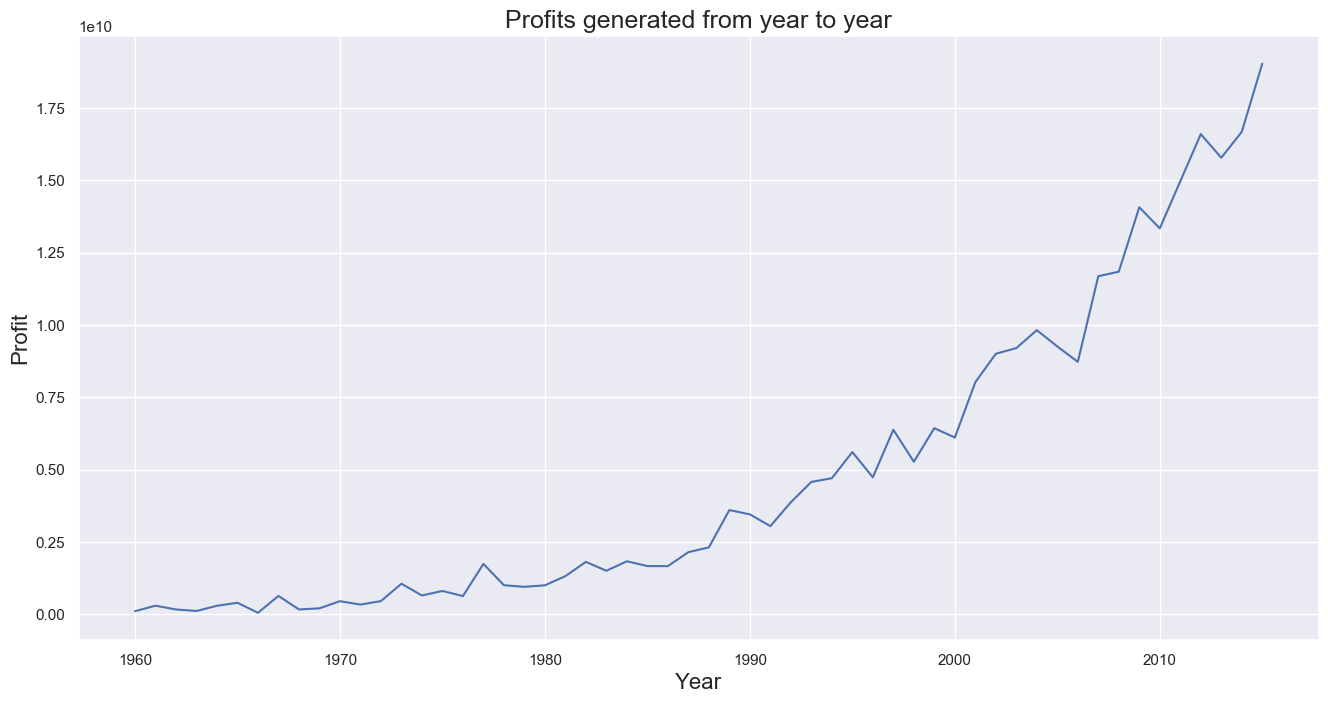

In [27]:
# Grouping the total profit generated each year
profit_gen = df.groupby('release_year')['profit_loss'].sum()

# Plotting a line graph for the above data
plt.figure(figsize = (16,8), dpi = 130)
plt.title('Profits generated from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit', fontsize = 16)
plt.plot(profit_gen);

In [28]:
# Finding the years with maximum and minimum profits
profit_gen.idxmax(), profit_gen.idxmin()

(2015, 1966)

> **It appears that maximum profit was generated in the year 2015 and the minimum profit was generated in the year 1966.**

### 4. How much money is spent on movies every year? During which years the maximum amount of money spent?

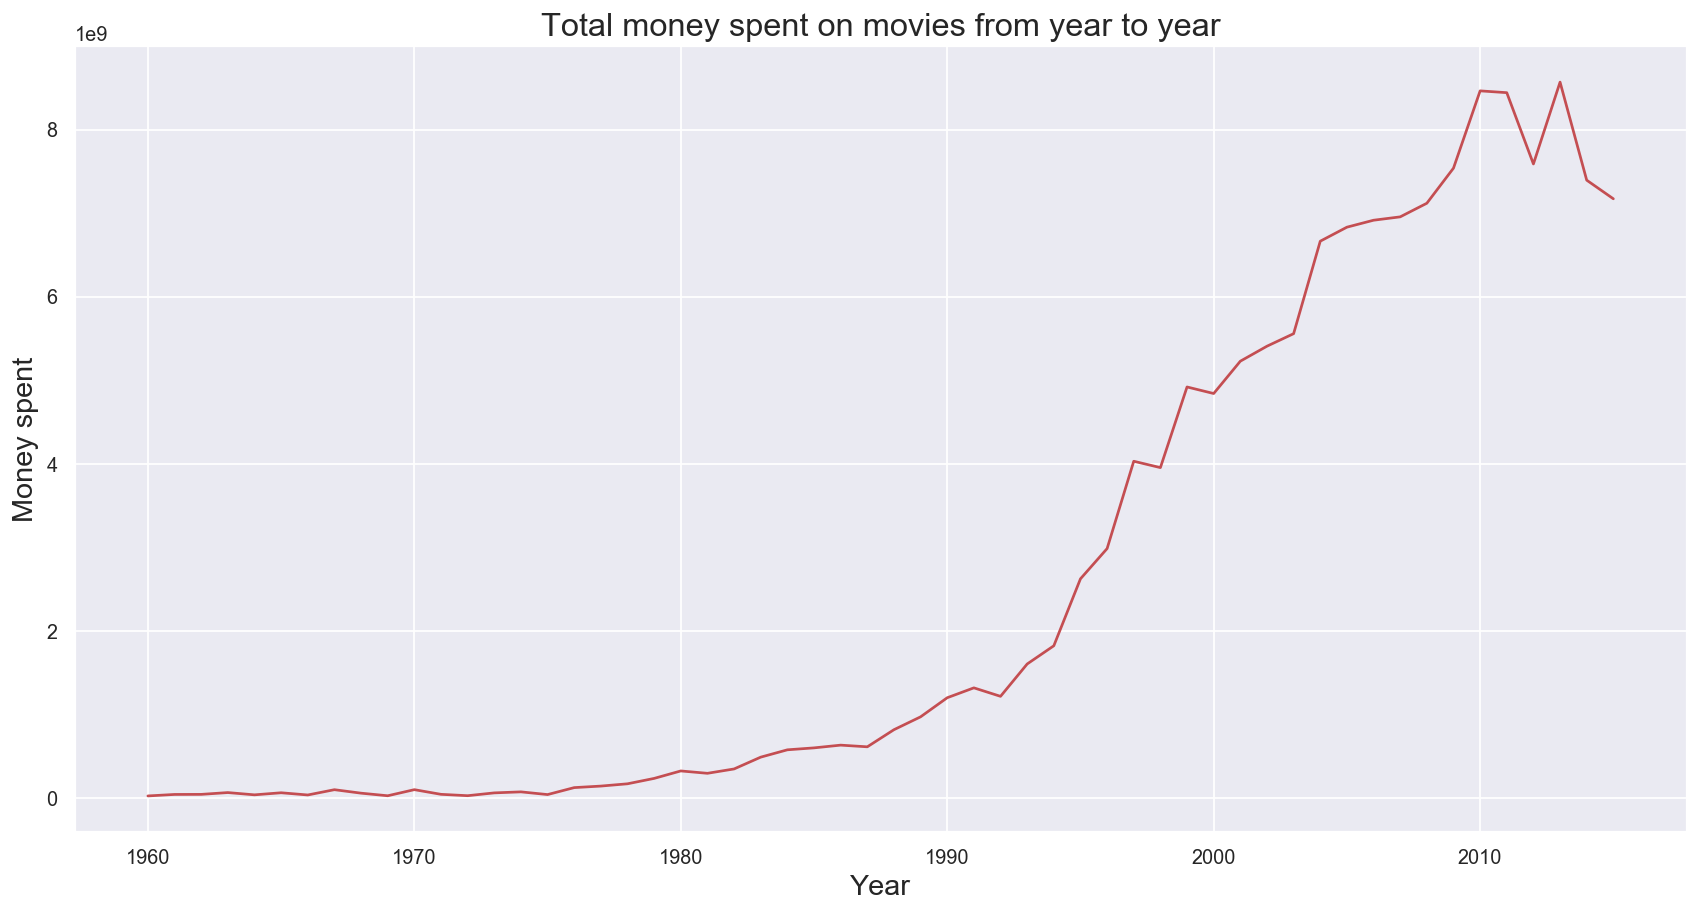

In [29]:
# Grouping the data total budget during each year
money_spent = df.groupby('release_year')['budget'].sum()

# Plotting a line graph for the above data
plt.figure(figsize = (16,8),  dpi=130)
plt.title('Total money spent on movies from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Money spent', fontsize = 16)
plt.plot(money_spent, 'r');

In [30]:
# Finding the years with maximum and minimum amount of money spent
money_spent.idxmax(), money_spent.idxmin()

(2013, 1960)

> **It appears that maximum budget was used during the year 2013 and the minimum budget was used during 1960.**

### Average Runtime of all times

In [31]:
# Function to find averages for specific parameters
def find_avg(column):
    return column.mean()

In [46]:
# Finding average runtime of all the movies in the dataset
print('The average runtime of all the movies is {0:.1f}.'.format(find_avg(df['runtime'])))

The average runtime of all the movies is 109.2.


## Attributes leading to a successful movie

### I) Genre

In [33]:
# In order to find out which attributes lead to a successful movie,
# first we will assume that all the movies that make a profit equal to or greater than $50 Million.
# Now, we will create a new dataframe using only the columns required for further analysis.
# This dataframe will contain data only about those movies which are successful

# Creating a list of useful columns
profit_reqs = ['original_title', 'genres', 'production_companies', 'director', 'cast','budget', 'revenue', 'profit_loss', 'runtime']

# Adding the required data to new dataframe
profit_df = df.query('profit_loss >= 50000000')[profit_reqs]

# Checking the new dataframe
profit_df.head()

,original_title,genres,production_companies,director,cast,budget,revenue,profit_loss,runtime
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,150000000.0,1.513529e+09,1.363529e+09,124.0
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,150000000.0,3.784364e+08,2.284364e+08,120.0
2,Insurgent,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,110000000.0,2.952382e+08,1.852382e+08,119.0
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,200000000.0,2.068178e+09,1.868178e+09,136.0
4,Furious 7,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,190000000.0,1.506249e+09,1.316249e+09,137.0


In [34]:
# Getting the total number of movies that are successful
profit_df.index.value_counts().sum()

1338

In [35]:
# Creating a function which takes any column as argument and returns the total
def count_attr(column):
    
    # Converting column into string and separating the string by '|'
    data = profit_df[column].str.cat(sep = '|')
    
    # Storing the data in a pandas series while splitting by '|'
    data = pd.Series(data.split('|'))
    
    # Getting the total counts in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [36]:
# Variable that stores the total number of successful movies in different genres
count_genre = count_attr('genres')

# Checking the top values
count_genre.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

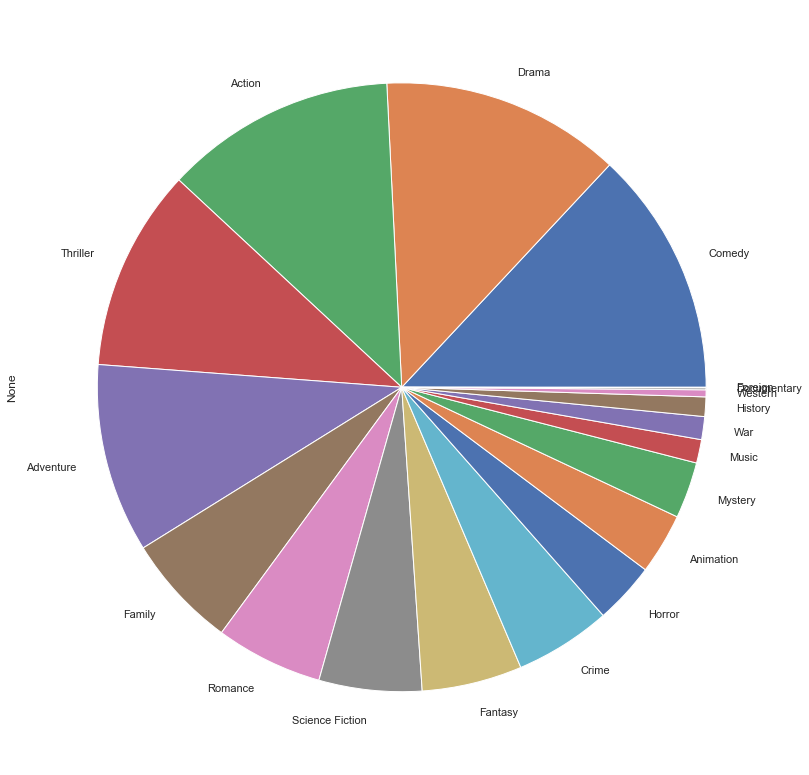

In [37]:
# Plotting a pie chart for the various genres and their counts
count_genre.plot(kind = 'pie', figsize = (14,14));

### II) Cast

In [38]:
# Variable that stores the names of the actors/actresses and
# the total number of successful movies they casted in
count_cast = count_attr('cast')

# Checking the top values
count_cast.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

### III) Director

In [39]:
# Variable that stores the names of the directors and
# the total number of successful movies they directed
count_director = count_attr('director')

# Checking the top values
count_director.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

### IV) Production Company

In [40]:
# Variable that stores the names of the production companies and
# the total number of successful movies they produced
count_prod = count_attr('production_companies')

count_prod.head()

Universal Pictures                        156
Warner Bros.                              144
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    118
Columbia Pictures                          93
dtype: int64

## Now let's find out about the average budget, average revunue and average runtime of a successful movie

### Average budget of a successful movie

In [49]:
# Variable that stores the average budget of a successful movie
avg_budget = find_avg(profit_df['budget'])

print('The average budget of a successful movie is {0:.2f}.'.format(avg_budget))

The average budget of a successful movie is 60444957.76.


### Average revenue generated from  a successful movie

In [48]:
# Variable that stores the average revenue generated by a successful movie
avg_revenue = find_avg(profit_df['revenue'])

print('The average revenue generated by a successful movie is {0:.2f}.'.format(avg_revenue))

The average revenue generated by a successful movie is 254957662.59.


### Average runtime of a successful movie

In [47]:
# Variable that stores the average runtime of a successful movie
avg_runtime = find_avg(profit_df['runtime'])

print('The average runtime of the successful movies is {0:.1f}.'.format(avg_runtime))

The average runtime of the successful movies is 113.7.


> **The average runtime for a successful movie is nearly similar to that of average runtime of all times. <br />
> Hence, runtime is not highly affected by the success of a movie.**

<a id='conclusions'></a>
## Conclusions

* It is observed from the analysis, that the budget of any movie is a huge factor in success and popularity. The movies with higher budgets are more popular and successful.

* Also, in order to have a successful movie, following values for various attributes can be taken into considerations:
    * **Genre:** Comedy, Drama, Action, Adventure, Thriller
    * **Cast:** Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Cameron Diaz
    * **Director:** Steven Spielberg, Robert Zemeckis, Clint Eastwood, Tim Burton, Tony Scott
    * **Production Company:** Universal Pictures, Warner Bros., Paramount Pictures, Twentieth Century Fox Film Corporation, Columbia Pictures
    * **Budget:** $60444957.76
    * **Runtime:** 113.7 minutes
        
* It is also observed that the movie industry is an ever booming industry and it has not seen a sharp decline over the past 55 years.


> ### Limitations
* There was no data provided for the success of a movie. The profit band chosen ($50 Million) was on assumption basis.
* Secondly, there were no currency units provided for the budget and revenue. If the currency is not standard then the data analysis done here makes not sense at all.
* More than 6000 rows were dropped because of Null and zero values. If data was available for those rows, the analysis would have been much precise as the clarity increase with increase in number of instances available.
* I could not comprehend the metrics of popularity clearly as there was no maximum score of popularity provided.

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0